In [1]:
from qiskit import Aer, QuantumCircuit
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

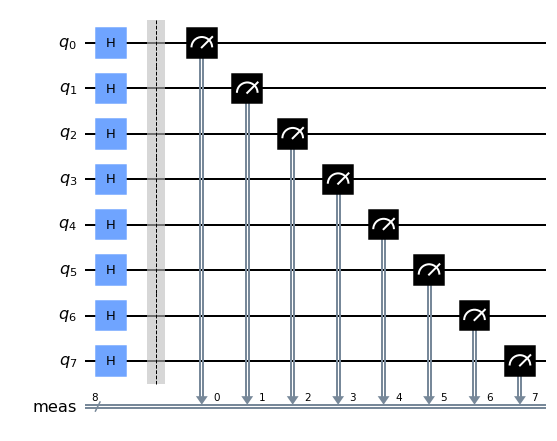

In [2]:
qc = QuantumCircuit(8)
qc.h(range(8))
qc.measure_all()
qc.draw(output='mpl')

In [3]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc, shots=100000).result()
counts = result.get_counts()
len(counts)

256

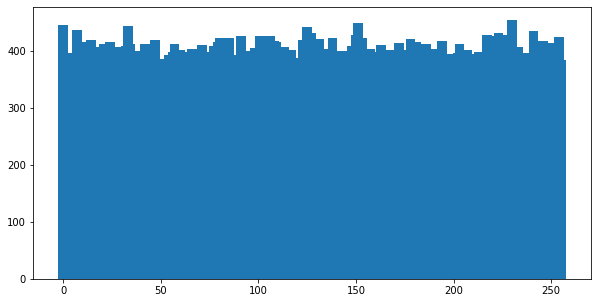

In [4]:
plt.bar([int(x, 2) for x in counts.keys()], counts.values(), width=5)
plt.show()

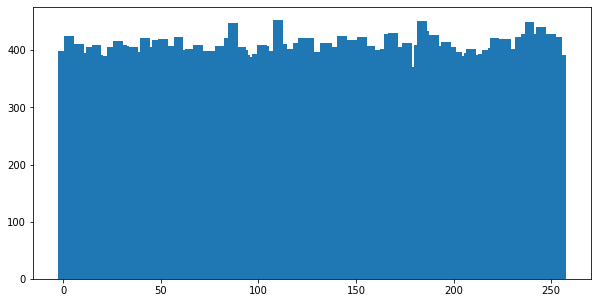

In [18]:
#from qiskit.circuit.library import UniformDistribution
from qiskit_finance.circuit.library import UniformDistribution
qc2 = UniformDistribution(8)
qc2.measure_all()
result2 = sim.run(qc2.decompose(), shots=100000, memory=True).result()
counts2 = result2.get_counts()
plt.bar([int(x, 2) for x in counts2.keys()], counts2.values(), width=5)
plt.show()